In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import sqlite3
import json
from datetime import datetime

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.9.1


In [4]:
from scipy.stats import spearmanr

## read in data from local sqlite database
read in data 

In [5]:
df = pd.read_json('../ML_data.json')

## clean data

In [6]:
dataset = df[['STN','ST','DATETIME','H','Temp','P','Vm','Vmsat']]

df_index = (dataset['DATETIME']>datetime(2015,1,1,0)) & (dataset['DATETIME']<datetime(2020,1,1,0))
dataset = dataset[df_index]

#stnlist=['新竹浮標','龜山島浮標','臺東外洋浮標','龍洞浮標','小琉球浮標','花蓮浮標','東沙島浮標','馬祖浮標']
#stnlist=['東沙島浮標']
#stnlist=['新竹浮標','臺東外洋浮標','東沙島浮標','馬祖浮標']
stnlist=['臺東外洋浮標','東沙島浮標','馬祖浮標']

dataset = dataset[dataset['STN'].isin(stnlist)]
dataset = dataset.dropna()

/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 27915 (\N{CJK UNIFIED IDEOGRAPH-6D0B}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 28014 (\N{CJK UNIFIED IDEOGRAPH-6D6E}) mi

/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from current font.
  func(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  func(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  func(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27915 (\N{CJK UNIFIED IDEOGRAPH-6D0B}) missing from current font.
  func(*args, **kwargs)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28014 (\N{CJK UNIFIED IDEOGRAPH-6D6E}) missing from current font.
  func(*args, **kwargs)
/Users/dschen/anacon

<Figure size 3200x1600 with 0 Axes>

/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27915 (\N{CJK UNIFIED IDEOGRAPH-6D0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dschen/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28014 (\N{CJK

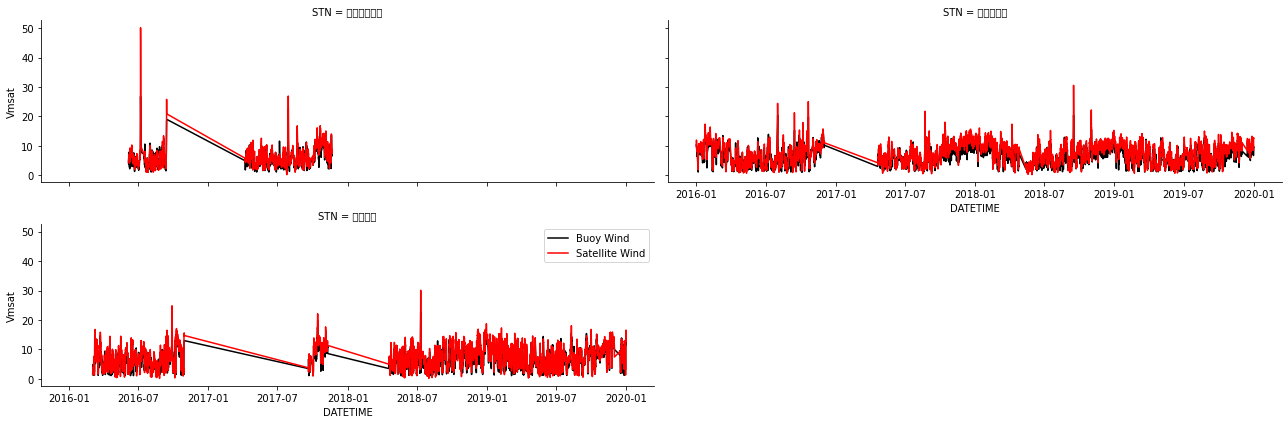

In [7]:
plt.figure(figsize=(16,8),dpi=200)
g = sns.FacetGrid(dataset, col="STN", col_wrap=2, height=3, aspect=3)
g.map(sns.lineplot, 'DATETIME','Vm',color='k')
g.map(sns.lineplot, 'DATETIME','Vmsat',color='r')
plt.legend(labels=['Buoy Wind','Satellite Wind'])

In [8]:
dataset.pop('DATETIME')
dataset.pop('ST')
dataset.pop('STN')

149823    臺東外洋浮標
149829    臺東外洋浮標
149835    臺東外洋浮標
149841    臺東外洋浮標
149847    臺東外洋浮標
           ...  
877101      馬祖浮標
877107      馬祖浮標
877113      馬祖浮標
877119      馬祖浮標
877125      馬祖浮標
Name: STN, Length: 9078, dtype: object

In [9]:
dataset.isna().sum()

H        0
Temp     0
P        0
Vm       0
Vmsat    0
dtype: int64

Drop those rows to keep this initial tutorial simple.

In [10]:
dataset = dataset.dropna()
dataset.isna().sum()

H        0
Temp     0
P        0
Vm       0
Vmsat    0
dtype: int64

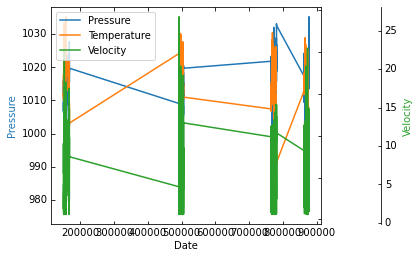

In [11]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel("Date")
host.set_ylabel("Pressure")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot(dataset['P'], label="Pressure")
p2, = par1.plot(dataset['Temp'], label="Temperature")
p3, = par2.plot(dataset['Vm'], label="Velocity")

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

host.legend()

### Split the data into train and test

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of your models.

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

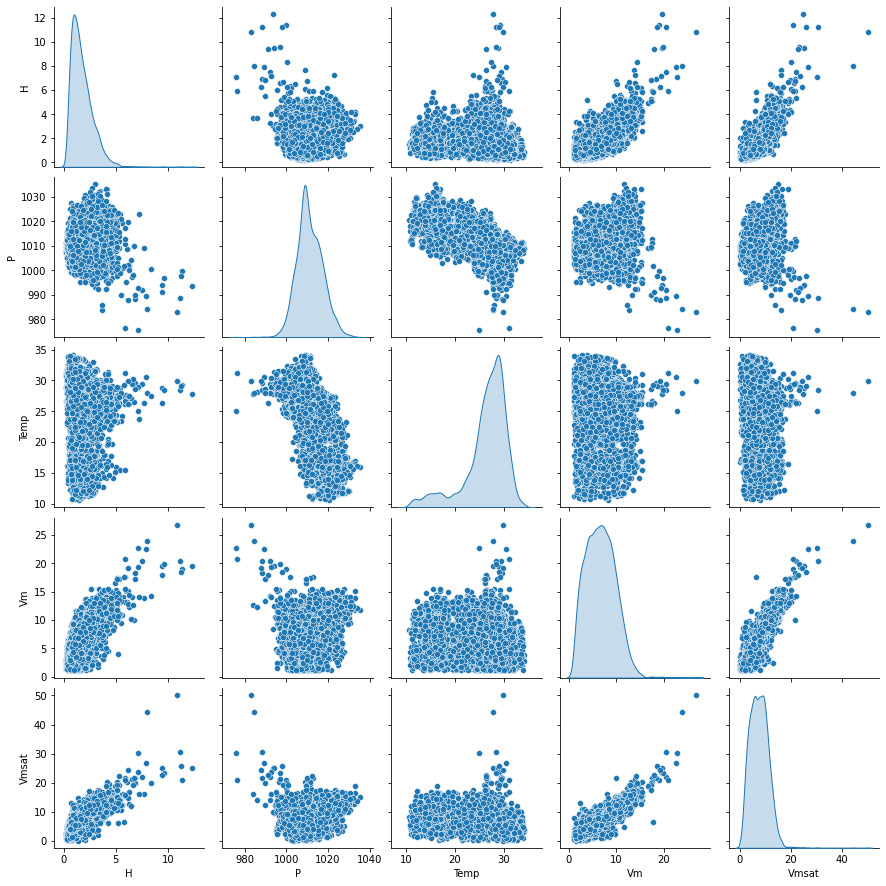

In [13]:
sns.pairplot(train_dataset[['H', 'P', 'Temp', 'Vm','Vmsat']], diag_kind='kde')

Also look at the overall statistics, note how each feature covers a very different range:

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H,7262.0,1.747535,1.047002,0.240000,0.970000,1.510000,2.280000,12.300000
Temp,7262.0,26.327279,4.359655,10.600000,25.000000,27.300000,29.200000,34.200000
P,7262.0,1011.084426,6.154957,975.700000,1007.100000,1010.400000,1015.200000,1035.200000
Vm,7262.0,6.649766,3.067025,1.100000,4.200000,6.500000,8.800000,26.800000
Vmsat,7262.0,7.535785,3.547133,0.143646,4.826973,7.420243,9.935997,50.117094


### Split features from labels

Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [15]:
train_features_s1 = train_dataset.copy()
test_features_s1 = test_dataset.copy()
train_labels_s1 = train_features_s1.pop('Vm')
test_labels_s1 = test_features_s1.pop('Vm')

train_features_s2 = train_dataset.copy()
test_features_s2 = test_dataset.copy()
train_labels_s2 = train_features_s2.pop('H')
test_labels_s2 = test_features_s2.pop('H')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [16]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
H,1.747535,1.047002
Temp,26.327279,4.359655
P,1011.084426,6.154957
Vm,6.649766,3.067025
Vmsat,7.535785,3.547133


## Two Steps AI

### One Variable



In [48]:
linear_model = tf.keras.models.load_model('saved_model/Vmsat_H_Vm_model')
dnn_model    = tf.keras.models.load_model('saved_model/Vmsat_H_ddn_Vm_model')
dnn_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_ddn_Vmsat_model')
dnn_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

#ddn_model_s1.predict(test_features)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64) 

In [49]:
test_labels_s1, test_labels_s2

(149823     4.9
 149960     8.7
 149972     7.5
 149990     3.4
 149996     3.5
           ... 
 876969     9.6
 876981     9.9
 877005     8.9
 877041    13.4
 877113    12.9
 Name: Vm, Length: 1816, dtype: float64,
 149823    1.41
 149960    1.84
 149972    1.34
 149990    1.25
 149996    1.19
           ... 
 876969    2.22
 876981    2.13
 877005    1.88
 877041    4.34
 877113    3.51
 Name: H, Length: 1816, dtype: float64)

In [50]:
wave_height = dnn_model_s2.predict(dnn_model_s1.predict(test_features_s1['Vmsat']))

57/57 [==============================] - 0s 2ms/step


Collect the results on the test set, for later:

In [51]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features_s2['Vmsat'],
    test_labels_s2, verbose=0)

test_results['dnn_model_1step'] = dnn_model.evaluate(
    test_features_s2['Vmsat'],
    test_labels_s2, verbose=0)

test_results['dnn_model_2step'] = dnn_model_s2.evaluate(
    dnn_model_s1.predict(test_features_s1['Vmsat']),
    test_labels_s2, verbose=0)

57/57 [==============================] - 0s 2ms/step


In [52]:
def plot_Vmsat(x, y):
  plt.scatter(train_features_s2['Vmsat'],train_labels_s2, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Vmsat')
  plt.ylabel('H')
  plt.legend()

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

In [53]:
x = np.linspace(0,40,100)
#y = Vmsat_model.predict(x)
y =  dnn_model_s2.predict(dnn_model_s1.predict(pd.DataFrame(x)))


4/4 [==============================] - 0s 2ms/step


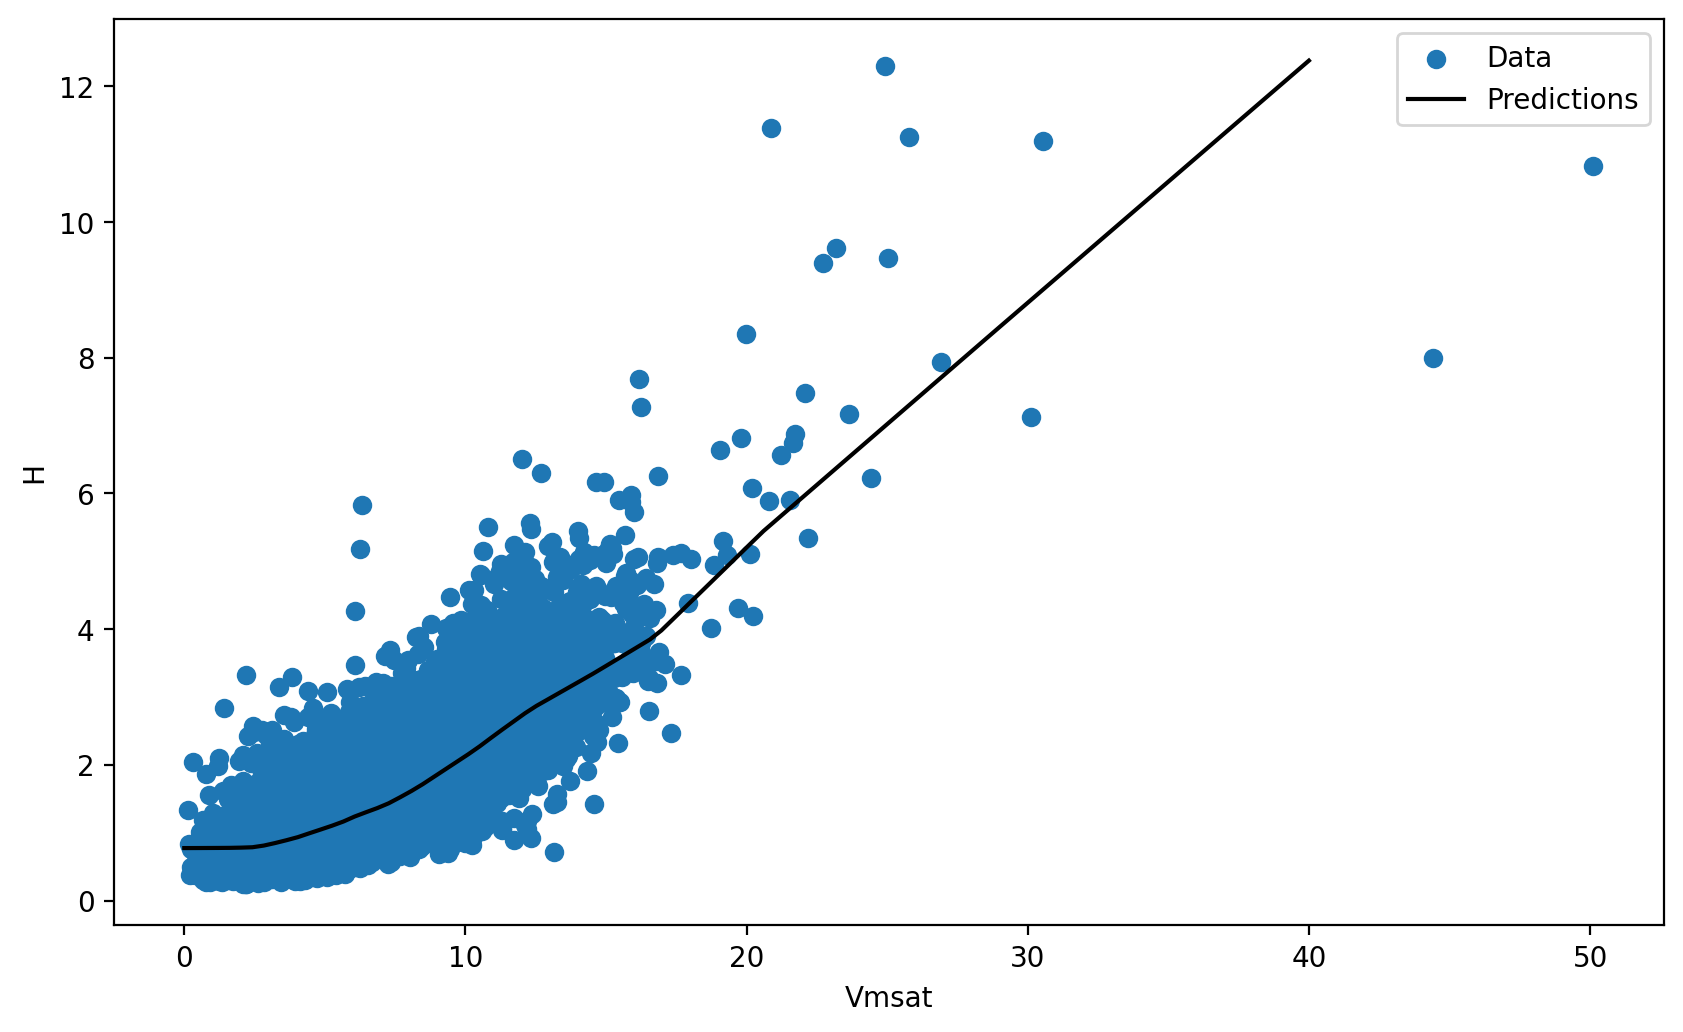

In [54]:
plt.figure(figsize=(10,6),dpi=200)
plot_Vmsat(x,y)

8/8 [==============================] - 0s 2ms/step


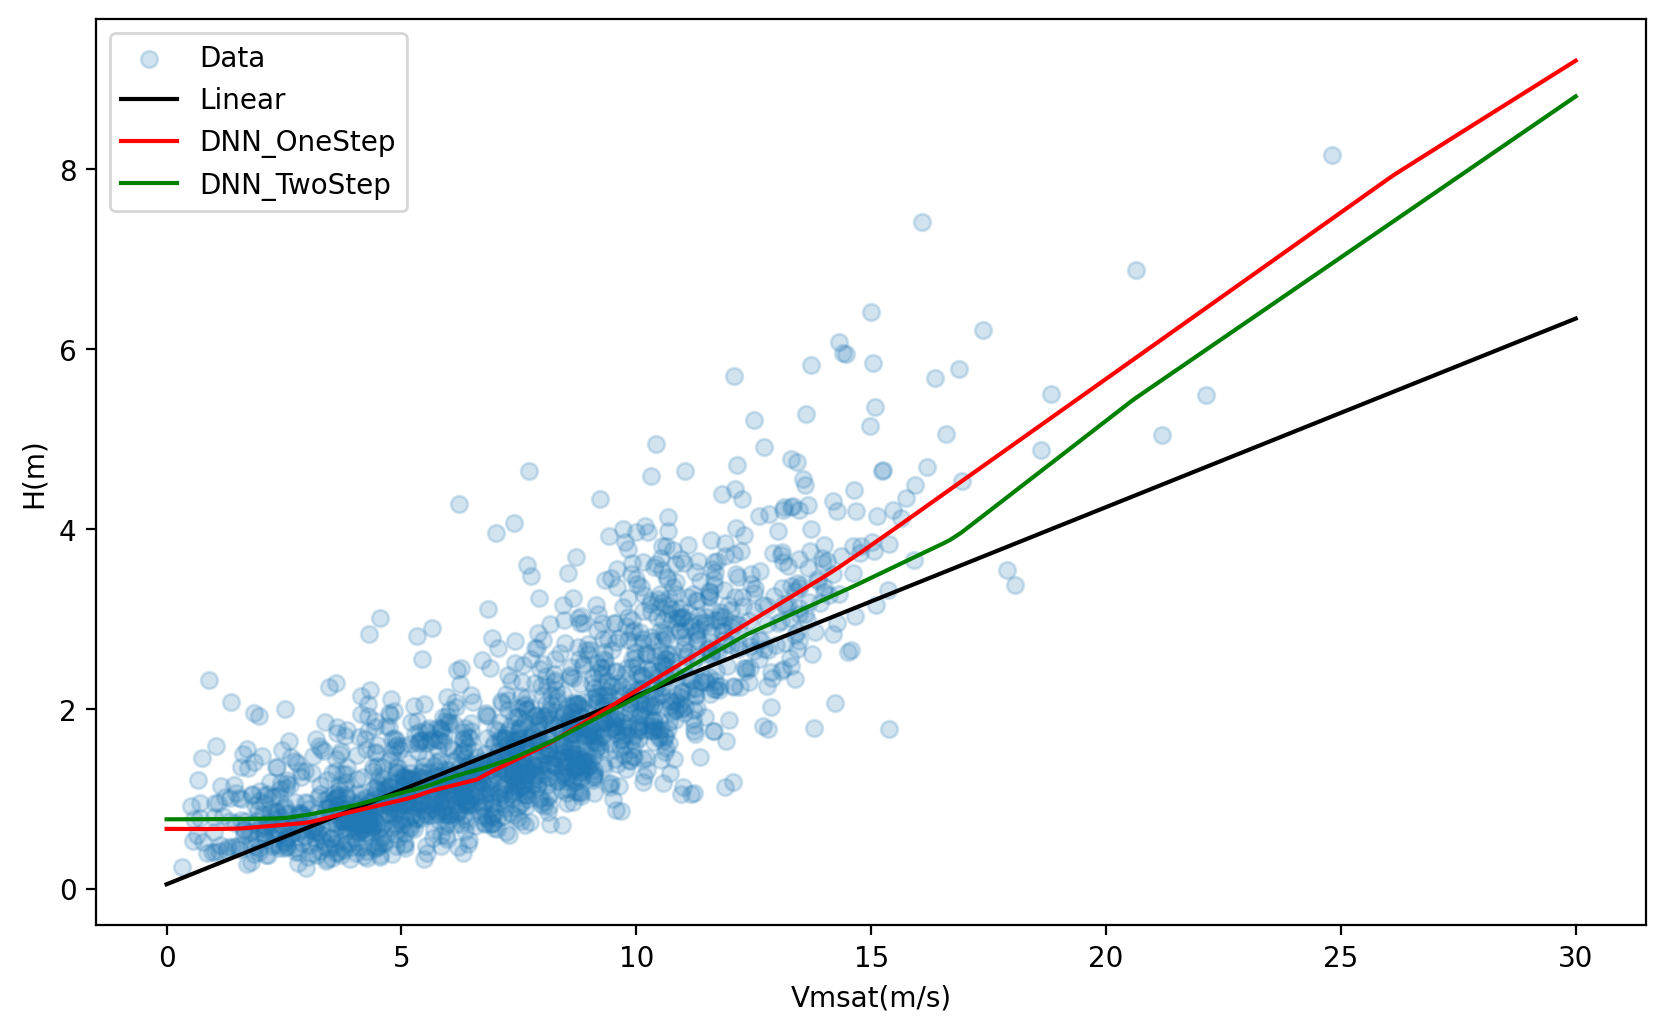

In [55]:
plt.figure(figsize=(10,6),dpi=200)
x = tf.linspace(0.0, 30, 251)
y  = linear_model.predict(pd.DataFrame(x))
y1 = dnn_model.predict(pd.DataFrame(x))
y2 = dnn_model_s2.predict(dnn_model_s1.predict(pd.DataFrame(x)))

plt.scatter(test_features_s2['Vmsat'], test_labels_s2, label='Data',alpha=0.2)
plt.plot(x, y , color='k', label='Linear')
plt.plot(x, y1, color='r', label='DNN_OneStep')
plt.plot(x, y2, color='g', label='DNN_TwoStep')

plt.xlabel('Vmsat(m/s)')
plt.ylabel('H(m)')
plt.legend()

In [56]:
df = pd.DataFrame(test_results, index=['Mean absolute error of H [m] ']).T
df['Total absolute error of H[m]'] = df['Mean absolute error of H [m] ']*len(test_labels_s2)
df['Total # of test cases'] = len(test_labels_s2)
df['Total # of train cases'] = len(train_labels_s2)
df

,Mean absolute error of H [m],Total absolute error of H[m],Total # of test cases,Total # of train cases
linear_model,0.468918,851.554918,1816,7262
dnn_model_1step,0.427581,776.486577,1816,7262
dnn_model_2step,0.436732,793.106005,1816,7262


57/57 [==============================] - 0s 2ms/step


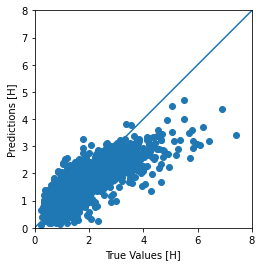

In [57]:
test_predictions = linear_model.predict(test_features_s2['Vmsat']).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

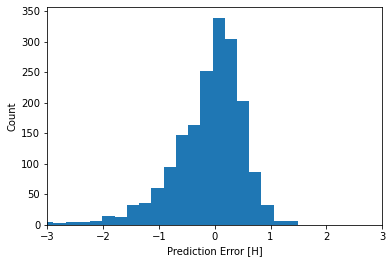

In [58]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

57/57 [==============================] - 0s 2ms/step


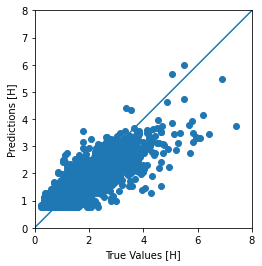

In [59]:
test_predictions = dnn_model_s2.predict(dnn_model_s1.predict(test_features_s1['Vmsat'])).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

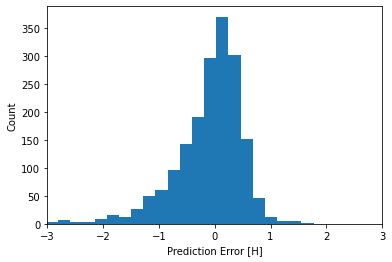

In [60]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

57/57 [==============================] - 0s 2ms/step


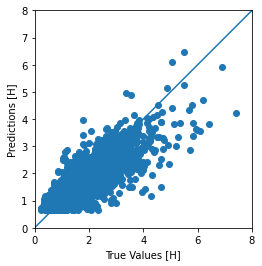

In [61]:
test_predictions = dnn_model.predict(test_features_s2['Vmsat']).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

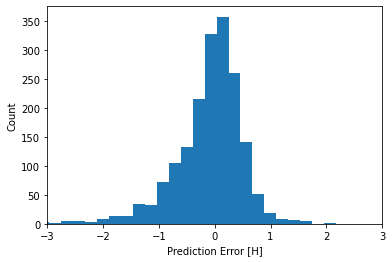

In [62]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

### Multiple inputs

In [63]:
linear_model = tf.keras.models.load_model('saved_model/Vmsat_H_linear_model')
dnn_model    = tf.keras.models.load_model('saved_model/Vmsat_H_ddn_model')
dnn_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_ddn_model')
dnn_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 6

In [64]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features_s2,
    test_labels_s2, verbose=0)

test_results['dnn_model_1step'] = dnn_model.evaluate(
    test_features_s2,
    test_labels_s2, verbose=0)

test_results['dnn_model_2step'] = dnn_model_s2.evaluate(
    dnn_model_s1.predict(test_features_s1),
    test_labels_s2, verbose=0)

57/57 [==============================] - 0s 2ms/step


In [65]:
df = pd.DataFrame(test_results, index=['Mean absolute error of H [m] ']).T
df['Total absolute error of H [m]'] = df['Mean absolute error of H [m] ']*len(test_labels_s1)
df['Total # of test cases'] = len(test_labels_s1)
df['Total # of train cases'] = len(train_labels_s1)
df

,Mean absolute error of H [m],Total absolute error of H [m],Total # of test cases,Total # of train cases
linear_model,0.518595,941.768484,1816,7262
dnn_model_1step,0.390336,708.850621,1816,7262
dnn_model_2step,0.442506,803.590599,1816,7262


57/57 [==============================] - 0s 3ms/step


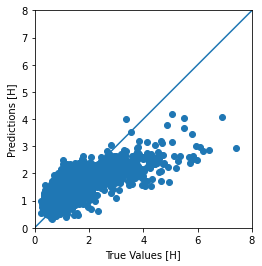

In [66]:
test_predictions = linear_model.predict(test_features_s2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

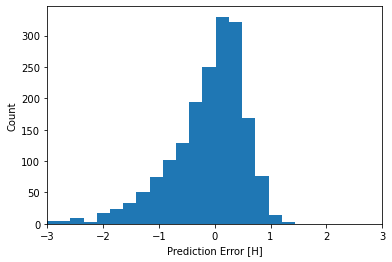

In [67]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

57/57 [==============================] - 0s 2ms/step


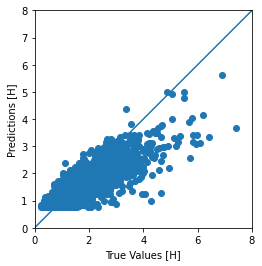

In [68]:
test_predictions = dnn_model_s2.predict(dnn_model_s1.predict(test_features_s1)).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

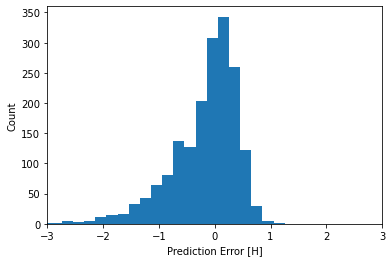

In [69]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

57/57 [==============================] - 0s 2ms/step


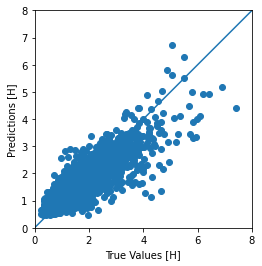

In [70]:
test_predictions = dnn_model.predict(test_features_s2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_s2, test_predictions)
plt.xlabel('True Values [H]')
plt.ylabel('Predictions [H]')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

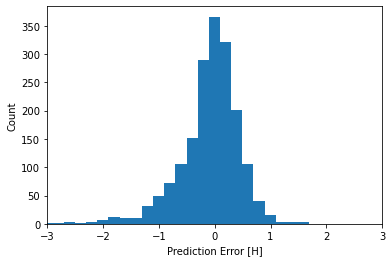

In [71]:
error = test_predictions - test_labels_s2
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [H]')
plt.xlim([-3,3])
_ = plt.ylabel('Count')

In [77]:
linear_model = tf.keras.models.load_model('saved_model/Vmsat_H_linear_model')
dnn_model    = tf.keras.models.load_model('saved_model/Vmsat_H_ddn_model')
dnn_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_ddn_model')
dnn_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')
linear_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_linear_model')
linear_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

test_results = {}

test_results['linear_model_1step'] = linear_model.evaluate(
    test_features_s2,
    test_labels_s2, verbose=0)

test_results['linear_model_2step'] = linear_model_s2.evaluate(
    linear_model_s1.predict(test_features_s1),
    test_labels_s2, verbose=0)

test_results['dnn_model_1step'] = dnn_model.evaluate(
    test_features_s2,
    test_labels_s2, verbose=0)

test_results['dnn_model_2step'] = dnn_model_s2.evaluate(
    dnn_model_s1.predict(test_features_s1),
    test_labels_s2, verbose=0)



df = pd.DataFrame(test_results, index=['Mean absolute error of H [m] ']).T
df['Total absolute error of H [m]'] = df['Mean absolute error of H [m] ']*len(test_labels_s1)
df['Total # of test cases'] = len(test_labels_s1)
df['Total # of train cases'] = len(train_labels_s1)
df

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 6

,Mean absolute error of H [m],Total absolute error of H [m],Total # of test cases,Total # of train cases
linear_model_1step,0.518595,941.768484,1816,7262
linear_model_2step,0.447953,813.482785,1816,7262
dnn_model_1step,0.390336,708.850621,1816,7262
dnn_model_2step,0.442506,803.590599,1816,7262


In [76]:
linear_model = tf.keras.models.load_model('saved_model/Vmsat_H_Vm_model')
dnn_model    = tf.keras.models.load_model('saved_model/Vmsat_H_ddn_Vm_model')
dnn_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_ddn_Vmsat_model')
dnn_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')
linear_model_s1 = tf.keras.models.load_model('saved_model/Vmsat_Vm_Vmsat_model')
linear_model_s2 = tf.keras.models.load_model('saved_model/Vm_H_ddn_Vm_model')

# Check its architecture
linear_model.summary()
dnn_model.summary()
dnn_model_s1.summary()
dnn_model_s2.summary()

#ddn_model_s1.predict(test_features)
test_results = {}

test_results['linear_model_1step'] = linear_model.evaluate(
    test_features_s2['Vmsat'],
    test_labels_s2, verbose=0)

test_results['linear_model_2step'] = linear_model_s2.evaluate(
    linear_model_s1.predict(test_features_s1['Vmsat']),
    test_labels_s2, verbose=0)

test_results['dnn_model_1step'] = dnn_model.evaluate(
    test_features_s2['Vmsat'],
    test_labels_s2, verbose=0)

test_results['dnn_model_2step'] = dnn_model_s2.evaluate(
    dnn_model_s1.predict(test_features_s1['Vmsat']),
    test_labels_s2, verbose=0)


df = pd.DataFrame(test_results, index=['Mean absolute error of H [m] ']).T
df['Total absolute error of H[m]'] = df['Mean absolute error of H [m] ']*len(test_labels_s2)
df['Total # of test cases'] = len(test_labels_s2)
df['Total # of train cases'] = len(train_labels_s2)
df

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64) 

,Mean absolute error of H [m],Total absolute error of H[m],Total # of test cases,Total # of train cases
linear_model_1step,0.468918,851.554918,1816,7262
linear_model_2step,0.433010,786.345478,1816,7262
dnn_model_1step,0.427581,776.486577,1816,7262
dnn_model_2step,0.436732,793.106005,1816,7262
